Question-1

In [1]:
#importing required libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv("data.csv")#get_df()
df.head()

# import numpy as np
# Age = [24,53,23,25,32,52,22,43,52,48]
# Salary = [40000,52000,25000,77000,48000,110000,38000,44000,27000,65000]
# College=['Yes','No','No','Yes','Yes','Yes','Yes','No','No','Yes']
# X = np.array([Age, Salary,College])
# dt = {'names':['Age', 'Salary','College'], 'formats':[int, int, str]}
# Y = np.zeros(len(Age), dtype=dt)
# print(dt)
# Y['Age'] = X[0]
# Y['Salary'] = X[1]
# Y['College']=X[2]
# print(Y)

,Age,Salary,College Degree
0,24,40000,Yes
1,53,52000,No
2,23,25000,No
3,25,77000,Yes
4,32,48000,Yes


In [4]:
#function to calculate entropy that belong to a particular class
def entropy_of_classes(one): 
    classEntropy = set(one)  # assigning the classEntropy
    summ = 0
    n = len(one)
    for no_of_class in classEntropy:   # for each class, get entropy
        class_n = sum(one==no_of_class)   #number of classes where elemensts in classEntropy is equal to one
        class_not_n=sum(one!=no_of_class)  #number of classes where elemensts in classEntropy is not equal to one
        #entr_c=entropy_cal(class_n, class_not_n) #calling the entropy functions to calculate the entropy
        if class_n== 0 or class_not_n == 0:  # if either class one is 0 or class two is 0 the entropy is 0
            entr_c= 0
        else:
            combined=class_n+class_not_n               #total number 
            entr_c = -(class_n*1.0/combined)*math.log(class_n*1.0/combined, 2) + -(class_not_n*1.0/combined)*math.log(class_not_n*1.0/combined, 2)
        e = class_n*1.0/n *entr_c  # weighted average
        summ += e       #adding the result to the total ns
        #print(summ,n)
    return summ, n

In [5]:
# Function to claculate the entropy of both the children in a node
def entropyTotal(y_predict, y_actual):
    len_y=len(y_predict)
    len_act=len(y_actual)
    if len_y != len_act:
        print('Same Length of Y actual and Y predict')
        return None
    n = len(y_actual)
    sideTrue, no_of_true = entropy_of_classes(y_actual[y_predict]) # entropy of left child by calling entropy function
    #print(sideTrue,no_of_true)
    sideFalse, no_of_false = entropy_of_classes(y_actual[~y_predict]) # entropy of right child by calling entropy function
    #print(sideFalse,no_of_false)
    sides = no_of_true*1.0/n * sideTrue + no_of_false*1.0/n * sideFalse # Total entropy with weighted averages
    return sides

**1.1**

In [6]:
#class defining Decision Tree Classifier
class DtClassifier(object):
    def __init__(self,namesOfFeatures,maxDepth):
        self.depth = 0
        self.namesOfFeatures=namesOfFeatures # definign the class members
        self.maxDepth = maxDepth
    
    def fit_tree(self, x, y, partitionNode={}, depth=0):
        if partitionNode is None: # there is no partition of node  
            return None # then we return none
        elif len(y) == 0: # or if the length of target varible is 0 we return None
            return None
        elif self.same_items(y): # if the function has the same items
            return {'value_':y[0]} # we return its value_ues
        elif depth >= self.maxDepth: # if the depth of our tree is greater than the maximum depth assigned we return none
            return None
        else: 
            column, threshold, entropy,informationGain = self.best_split(x, y) #based on the information gain we split
            left_split = y[x[:, column] < threshold] # assigning the thresholds to both left and right value_ues of y
            right_split = y[x[:, column] >= threshold]   #assigning  left and right split the values of y based on the threshold
            #print(left_split,right_split)
            partitionNode = {'column': self.namesOfFeatures[column], 'index_col':column, 'threshold':threshold,'value_': np.round(np.mean(y)),
                       'entropy':entropy,'informationGain':informationGain}
            # based on the thresholds assigining the left partitions
            partitionNode['left'] = self.fit_tree(x[x[:, column] < threshold], left_split, {}, depth+1) 
            # based on the thresholds assigining the right partitions
            partitionNode['right'] = self.fit_tree(x[x[:, column] >= threshold], right_split, {}, depth+1)
            self.depth += 1 # adding depth by 1 more level 
            self.trees = partitionNode
            return partitionNode
    
    def best_split(self, x, y):
        informationGainMinimum=0   
        entropyMinimum = 1 # Minimum entropy that we assign is 1
        column = None
        threshold = None  # assigning thereshold as None
        for i, c in enumerate(x.T): #iterating through the avleus in x
            entropy,informationGain,currentThreshold=self.helper_split(c, y)
            if entropy == 0:    # We stop iterating after we have found the very first threshold
                return i, currentThreshold, entropy,informationGain
            if entropy <= entropyMinimum: # if the entropy is lesser or equal than the minimum 
                entropyMinimum = entropy # we assign teh current entorpy as teh minimum entropy
                informationGainMinimum=informationGain ## we assign the informationGain as informationGainMinimum
                column = i
                threshold = currentThreshold # we assign the currentThreshold as threshold
        return column, threshold, entropyMinimum,informationGainMinimum
    
#function for finding the best split based on the target and input parameters
    def helper_split(self, column, y):
        entropyMinimum = 15 # assigning minimum entropy as 10
        entropyOfParent=entropy_of_classes(y)[0] #assigning the first class entropy as the parent entropy
        n = len(y) #length of y
        for value_ue in set(column):
            y_predict = column < value_ue # assiging teh boolean value to the y_predict if column value is lesser than the value 
            entropyNow = entropyTotal(y_predict, y) # assigning the previous entropy and our currrent entropy
            if entropyNow <= entropyMinimum:
                informationGainMinimum = entropyOfParent-entropyNow # calculating informationGainMinimum
                entropyMinimum = entropyNow
                threshold = value_ue # assign teh current avlue as threshold
        return entropyMinimum, informationGainMinimum, threshold
    
    def same_items(self, items): # returning all the values in items
        return all(x == items[0] for x in items)
    
#function for doing thh predictions                                       
    def predict(self, x):
        res_ = np.array([0]*len(x)) # assigning an array of zeros to the results list
        tree = self.trees
        for i, c in enumerate(x):
            res_[i] = self.predict_helper(c)#  calculating the values of results
        return res_

#function to get the prediction
    def predict_helper(self, row):
        currentLevel = self.trees
        while currentLevel.get('threshold'):# if the current levl of threshold is greater than therow of teh current level in teh indec xolumns
            if row[currentLevel['index_col']] > currentLevel['threshold']:
              #print('right')
                currentLevel = currentLevel['right'] # we assign the right child as the current level or                
            else:
                #print('left'')
                currentLevel = currentLevel['left'] # we assign the left child as the current level

        else:
            return currentLevel.get('value_')


In [7]:
def last_col_conv(amount):
    if amount == 'Yes':
        #if the value is Yes returning one else zero
        return 1
    return 0
df.iloc[:,-1]=df.iloc[:,-1].map(last_col_conv)   #mapping the last column values to the 1 or 0 based on Yes or No
first=np.array(df.iloc[:,0:2])

In [8]:
tree = DtClassifier(df.columns,maxDepth=5)
inpu=np.array(df.iloc[:,0:2])    #taking the x values in the data 
res=np.array(df.iloc[:,-1])       #y values in the dataframe
m = tree.fit_tree(inpu, res)      #fitting the value into the Tree 
print(m) 

{'column': 'Salary', 'index_col': 1, 'threshold': 38000, 'value_': 1.0, 'entropy': 0.6490224995673063, 'informationGain': 0.3219280948873623, 'left': {'value_': 0}, 'right': {'column': 'Age', 'index_col': 0, 'threshold': 43, 'value_': 1.0, 'entropy': 0.5, 'informationGain': 0.31127812445913283, 'left': {'value_': 1}, 'right': {'column': 'Salary', 'index_col': 1, 'threshold': 65000, 'value_': 0.0, 'entropy': 0.0, 'informationGain': 1.0, 'left': {'value_': 0}, 'right': {'value_': 1}}}}


In [9]:
data_frame_1=df.copy() # copying the data frame 
data_frame_1['predict']=-100
ent_of_par=entropy_of_classes(res)[0] # parent's entropy 
value_of_gain=0   #initializing the min value of gain ot 0
np.random.seed(1)
alpha = np.random.rand() # assigning some random variables to alpha and beta
beta=np.random.rand()   
countParent=res.shape[0]   #shaping the parent variable into the shape of y

In [10]:
for loop in range(100):
    for i in data_frame_1.index:
        x1=data_frame_1.iloc[i].values[0] # assiging the 0th values from the data_frame_1 dataframe to x1
        x2=data_frame_1.iloc[i].values[1] # assiging the 1th values from the data_frame_1 dataframe to x2
        if alpha*x1+beta*x2-1<0: # basic check
            data_frame_1.loc[i,'predict']=0 # if the values of the index innadat frame an dtaht of the predict are 0 then
            if(data_frame_1.loc[i,'predict']!=data_frame_1.loc[i,'College Degree']): # we check if they are not equal to the colleg degree values
                alpha=alpha+x1 # if not then we add the x values from the data frame to alpha values
                beta=beta+x2 # same it is for beta
        else:
            data_frame_1.loc[i,'predict']=1 # if teh values of the index in data frame and tht of the predict are 1 then
            if(data_frame_1.loc[i,'predict']!=data_frame_1.loc[i,'College Degree']): # if prediction is not equal to the true value the going into the loop
                alpha=alpha-x1 #  subtract the x1 values from the data frame from aplha vaue
                beta=beta-x2 # subtracting x2 from beta
    
 #assigning the left and right values of the tree based on the target variable   
    left_side=data_frame_1.loc[data_frame_1['predict']==0,'College Degree']    #if the college degree is 0, going left
    right_side=data_frame_1.loc[data_frame_1['predict']==1,'College Degree']    #if the college degree is 1, going right
    entropyRight=entropy_of_classes(right_side)[0] #assigning the left and right values of the entropy 
    rightCount=right_side.shape[0]     #finding the shape of right dataframe (number of nodes in right side)
    leftCount=left_side.shape[0] # assigning the rows count as the left child dataframe
    #print(rightCount,leftCount)
    entropyLeft=entropy_of_classes(left_side)[0]   #finding the entropy of the left chidren
    left=entropyLeft*(leftCount/countParent)   #left side value inorder to find the gain
    right=entropyRight*(rightCount/countParent)  #left side value inorder to find the gain
    #print(left,right)
    averages=left+right      
    value_of_gain=ent_of_par-averages # calculating the gain by subtracting average from entropy of parent
    if(value_of_gain==ent_of_par):   #exiting the loop when gain is equal to entropy of class
      print(" Final Alpha Values=",alpha, "; Beta Values=",beta, "; value_of_gain Values=",value_of_gain)
      break


 Final Alpha Values= -897.5829779952974 ; Beta Values= 0.7203244934498798 ; value_of_gain Values= 0.9709505944546686


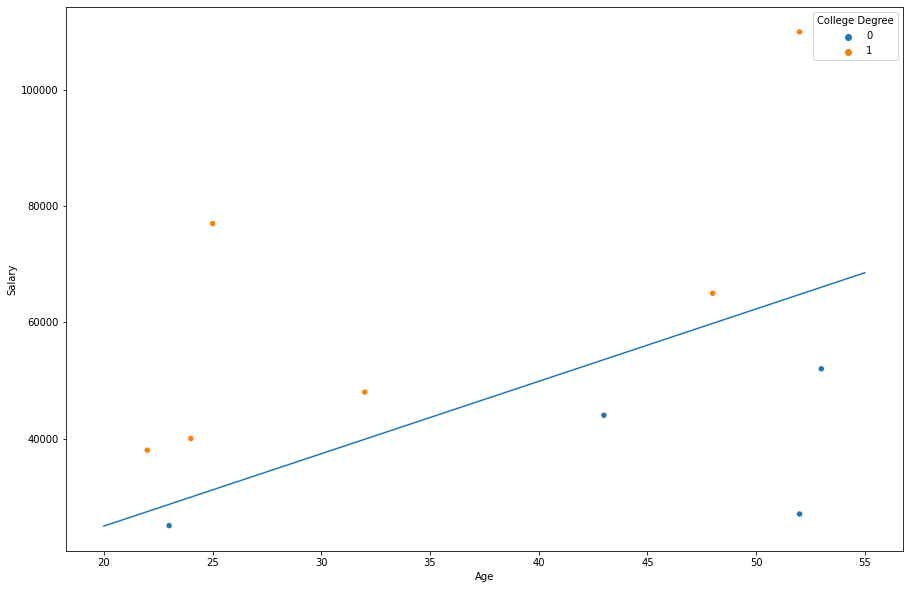

In [11]:
fig = plt.figure()
#setting up size of the figure
fig.set_size_inches(15,10)
ax = plt.axes()
#giving the figure the data, x, y and the result values
ax=sns.scatterplot(data=df,x='Age',y='Salary',hue='College Degree')   #doing the scatter plot
xx=np.linspace(20,55,2)
ax.plot(xx,(-1*(1/beta)-(alpha/beta)*xx))    #plotting the classification line based on the values alpha and beta
plt.show()

**1.3**

**Advantages** 

A single variate or variable quantity is what is meant by the term "univariate." Contrarily, the term "multivariate" refers to the simultaneous use of several variates or variable quantities. Multivariate decision trees can therefore branch using all qualities at a single node. Multivariate decision trees converge substantially more quickly for the linearly separable datasets than univarate decision trees.

**Disadvantages**

In multivariate trees, hyperplanes of any orientation are employed. This implies that there could be 2^d(NCd)  different Hyperplanes. This makes thorough search ineffective and unworkable. Therefore, utilizing a linear multivariate node that adds the weights for each feature is a more useful method of using. In order to make the procedure more effective and practical, linear multivariate decision trees select the most crucial features out of all of the available ones.Additionally, the fundamental use of univariate decision trees is to make the feature importance more interpretable than it would be with multivariate trees.

*References:*
<li>https://towardsdatascience.com/implementing-a-decision-tree-from-scratch-f5358ff9c4bb
<li>https://web.njit.edu/~usman/courses/cs675_fall16/Comparing_Univariate_and_Multivariate_De.pdf
<li>https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/
<li>https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/ (for splitting the tree)
<li>https://levelup.gitconnected.com/building-a-decision-tree-from-scratch-in-python-machine-learning-from-scratch-part-ii-6e2e56265b19
</li>

Question-2

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


<h5>Bagging</h5>

In [13]:
class Bagging(object):
    def __init__(self,max_depth,seed=None):
        self.classifiers = []
        self.seed = seed
        self.tree_depth = max_depth
        self.n = None
        self.d = None
        np.random.seed(self.seed)

    def fit(self,X_train,y_train,bootstrap):
        
        self.bootstrap = bootstrap
        self.n , self.d = X_train.shape
        for b in range(self.bootstrap):
            sample = np.random.choice(np.arange(self.n),size = self.n,replace=True)
            temp_X_train = X_train[sample]
            temp_y_train = y_train[sample]
            weak_class = DecisionTreeClassifier(max_depth=self.tree_depth)
            weak_class.fit(temp_X_train, temp_y_train)
            self.classifiers.append(weak_class)
    def predict(self,X_test):
        len_xt = len(X_test)
        y_hat = np.empty((len(self.classifiers),len_xt))
        y_pred = np.empty(len_xt)
        for i,weak_class in enumerate(self.classifiers):
            y_hat[i] = weak_class.predict(X_test)
        
        return np.where(y_hat.sum(0)>0,1,-1)

<h5>Adaboost</h5>

In [14]:
class AdaBoost(object):
    def __init__(self,max_depth):
        self.tree_depth = max_depth
        self.training_err = []
        self.pred_err = []
        self.rounds = None
        self.betas = []
        self.classifiers = []
    def fit(self,X,y_true,rounds = 100):
        self.betas = []
        self.training_err = []
        self.rounds = rounds
        weights = np.ones(len(y_true)) * 1/len(y_true)
        for round in range(rounds):
            if round != 0:
                # Step-4 Update the current weights
                weights = self.change_weights(weights,beta,y_true,y_pred)
            # Step-1 Train and fit a weak classifier
            weak_class = DecisionTreeClassifier(max_depth = self.tree_depth)
            weak_class.fit(X,y_true,sample_weight = weights)
            y_pred = weak_class.predict(X)
            self.classifiers.append(weak_class)

            # Step-2 Calculate the error of our weak classifier
            temp_err = self.calculate_err(weights,y_true,y_pred)
            self.training_err.append(temp_err)

            # Step-3 Calculate the new beta and append it to our beta table
            beta = self.calculate_beta(temp_err)
            self.betas.append(beta)
        assert len(self.betas) == len(self.classifiers)
    def calculate_err(self,weights,y_true,y_pred):
        return (sum(weights*(np.not_equal(y_true,y_pred)).astype(int)))/sum(weights)
    def calculate_beta(self,err):
        return np.log((1-err)/err)
    def change_weights(self,weights,beta,y_true,y_pred):
        
        return weights*np.exp(beta*(np.not_equal(y_true,y_pred)).astype(int))
    def predict(self,X):
        weak_pred = pd.DataFrame(index = range(len(X)),columns=range(self.rounds))

        for round in range(self.rounds):
            temp_pred = self.classifiers[round].predict(X) * self.betas[round]
            weak_pred.iloc[:,round] = temp_pred
        actual_pred = (1*np.sign(weak_pred.T.sum())).astype(int)
        return actual_pred

In [15]:
# re-usable ploting function for our ensemble models i.e., bagging, boosting
def plot(ens_model,X_train,y_train,X_test,y_test):
    train_err = np.empty(len(ens_model.classifiers))
    test_err = np.empty(len(ens_model.classifiers))
    for i,weak_class in enumerate(ens_model.classifiers):
        test_err[i] = 1-(len(y_test[weak_class.predict(X_test)==y_test])/len(y_test))
        train_err[i] = 1-(len(y_train[weak_class.predict(X_train)==y_train])/len(y_train))
    plt.figure(figsize=(16,8))
    plt.plot(train_err,c='g')
    plt.plot(test_err,c='r')
    plt.ylabel('Error')
    plt.xlabel('Bootstrap/Rounds')
    plt.legend(['train error','test error'],loc='center right')
    plt.show()

In [16]:
# importing Letter Dataset
df = pd.read_csv('letter-recognition.data',header = None)
df =  df[(df.iloc[:,0]=='C') | (df.iloc[:,0]=='G')]
df[0] = df[0].astype('category').cat.codes

In [17]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:17].values,df.iloc[:,0].values,random_state=54)
y_train = np.where(y_train==0,-1,1)
y_test = np.where(y_test==0,-1,1)


In [18]:
# Bagging on letter dataset
# setting our weak classifiers as tree stumps
bag_model = Bagging(max_depth=2,seed=456)
bag_model.fit(X_train,y_train,100)
y_pred = bag_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))

Accuracy - 84.39% for stumps with 100 rounds


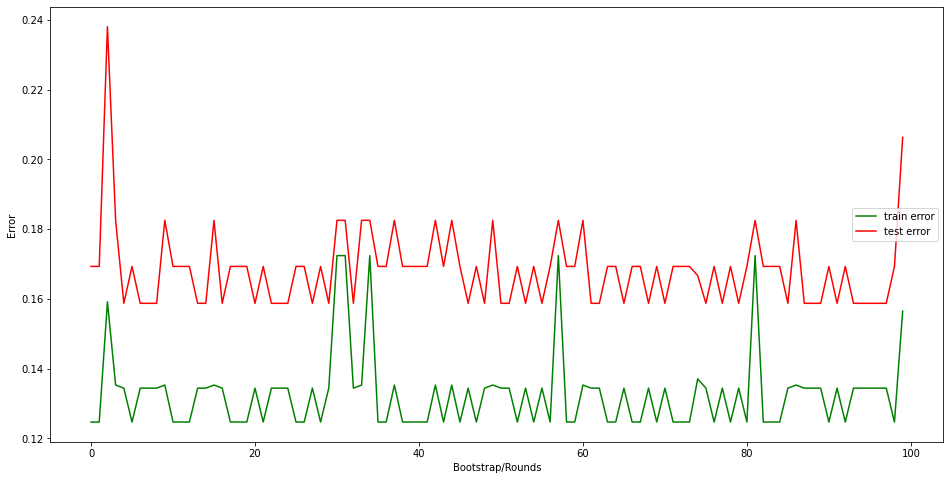

In [19]:
plot(bag_model,X_train,y_train,X_test,y_test)

In [20]:
# Lets perform bagging with tree depth=50
bag_model2 = Bagging(max_depth=50,seed=123)
bag_model2.fit(X_train,y_train,200)
y_pred = bag_model2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))

Accuracy - 94.97% for stumps with 100 rounds


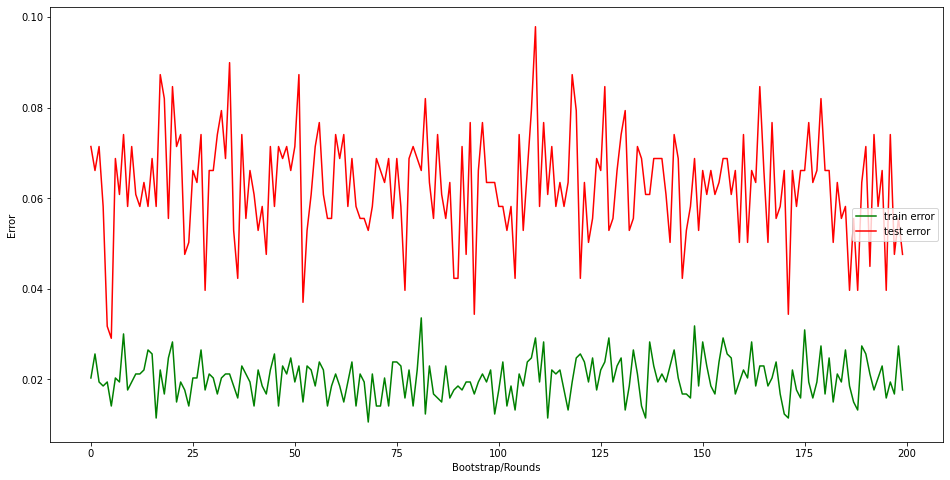

In [21]:
# with the increase of tree depth the bagging model
# gained a performance boost of over 10%
plot(bag_model2,X_train,y_train,X_test,y_test)


In [22]:
# performing AdaBoost with stump trees
adaboost_model = AdaBoost(max_depth =2)
adaboost_model.fit(X_train,y_train,rounds=100)
acc = accuracy_score(y_test,adaboost_model.predict(X_test))
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))

Accuracy - 97.88% for stumps with 100 rounds


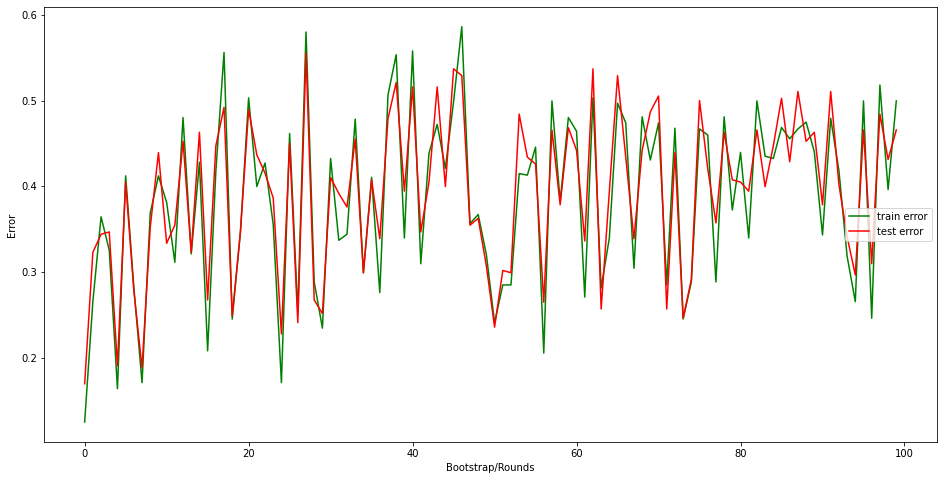

In [23]:

plot(adaboost_model,X_train,y_train,X_test,y_test)


we can see that a hand full of our weak classifiers(stump trees) have accuracy score less than 50%, which is worse that guessing a coin toss. But due to the power of boosting we have achieved ~98% accuracy 

In [24]:
#  performing AdaBoost with 'good' tree depth
adaboost_model = AdaBoost(max_depth = 8)
adaboost_model.fit(X_train,y_train,rounds=100)
acc = accuracy_score(y_test,adaboost_model.predict(X_test))
print('Accuracy - {0:.2f}% with 100 rounds'.format(acc*100))

Accuracy - 99.21% with 100 rounds


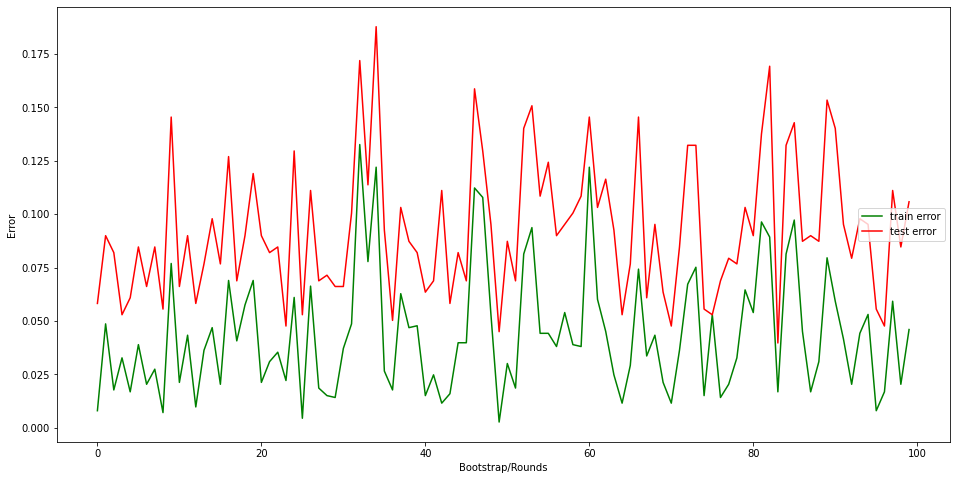

In [25]:
# with increased tree depth we gained 1% accuracy in performance, lets plot our training and testing errors
plot(adaboost_model,X_train,y_train,X_test,y_test)


In [26]:
df = pd.read_csv('spambase.data',header=None)

df[57] = df[57]*2-1
X_train, X_test, y_train, y_test = train_test_split((df.iloc[:,0:57].values),(df.iloc[:,57].values),random_state=123)

In [27]:
# Boosting on Spam Dataset
ada_model = AdaBoost(max_depth =2)
ada_model.fit(X_train,y_train,100)
pred = ada_model.predict(X_test)
acc = accuracy_score(y_test,ada_model.predict(X_test))
print('Accuracy - {0:.2f}% with 100 rounds'.format(acc*100))

Accuracy - 94.44% with 100 rounds


In [28]:
# along with accuracy score lets check the confusion matrix of our boosting model
print(confusion_matrix(y_test,pred))
# from confusion matrix we can calculate the precision, recall, and f1 score of our matrix

[[663  23]
 [ 41 424]]


In [29]:
# so we will use sklearn inbuilt method to provide us the above mentioned metrocs
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       686
           1       0.95      0.91      0.93       465

    accuracy                           0.94      1151
   macro avg       0.95      0.94      0.94      1151
weighted avg       0.94      0.94      0.94      1151



In [30]:
# lets perform adaboost with deeper trees
ada_model2 = AdaBoost(max_depth = 6)
ada_model2.fit(X_train,y_train,100)
pred = ada_model2.predict(X_test)
acc = accuracy_score(y_test,ada_model2.predict(X_test))
print('Accuracy - {0:.2f}% with 100 rounds'.format(acc*100))

Accuracy - 95.22% with 100 rounds


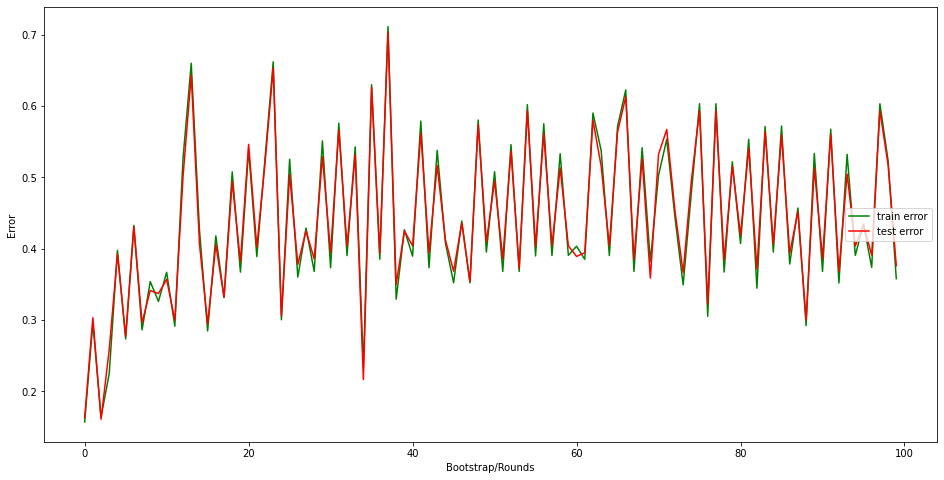

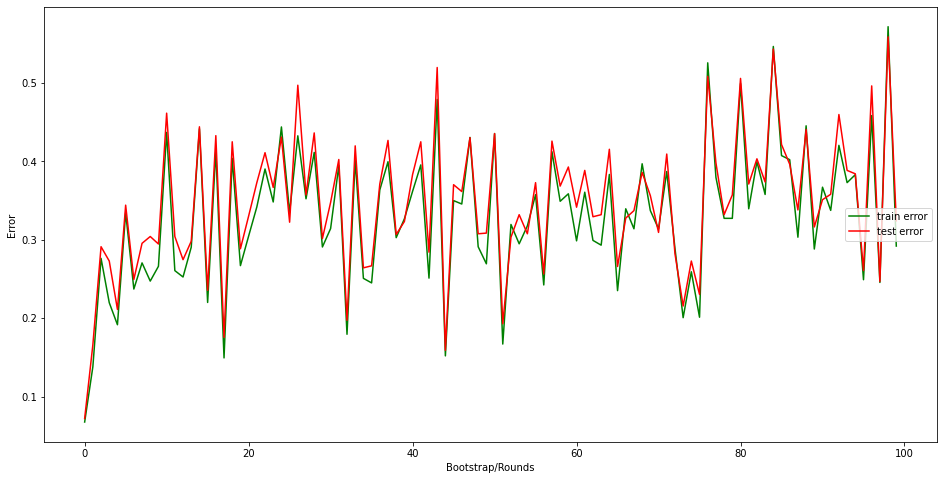

In [31]:
# with the increase of tree depth we have gained ~1% in classification performance
# lets plot the training,testing errors of both models
plot(ada_model,X_train,y_train,X_test,y_test)
plot(ada_model2,X_train,y_train,X_test,y_test)
# we can observe that with increase in tree depth the mean error rate of individual model has decreased a lot

In [32]:
# Bagging for Spam dataset
# setting our weak classifiers as tree stumps
bag_model = Bagging(max_depth=2,seed=456)
bag_model.fit(X_train,y_train,100)
y_pred = bag_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))


Accuracy - 88.36% for stumps with 100 rounds


In [33]:
# Lets perform bagging with tree depth=50
bag_model2 = Bagging(max_depth=50,seed=123)
bag_model2.fit(X_train,y_train,200)
y_pred = bag_model2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))

Accuracy - 95.48% for stumps with 100 rounds


In [34]:
# lets check the confusion matrix and classification report of the better performing bagging model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
# we can observe that varaince has reduced with the better performing bagging model

[[671  15]
 [ 37 428]]
              precision    recall  f1-score   support

          -1       0.95      0.98      0.96       686
           1       0.97      0.92      0.94       465

    accuracy                           0.95      1151
   macro avg       0.96      0.95      0.95      1151
weighted avg       0.96      0.95      0.95      1151



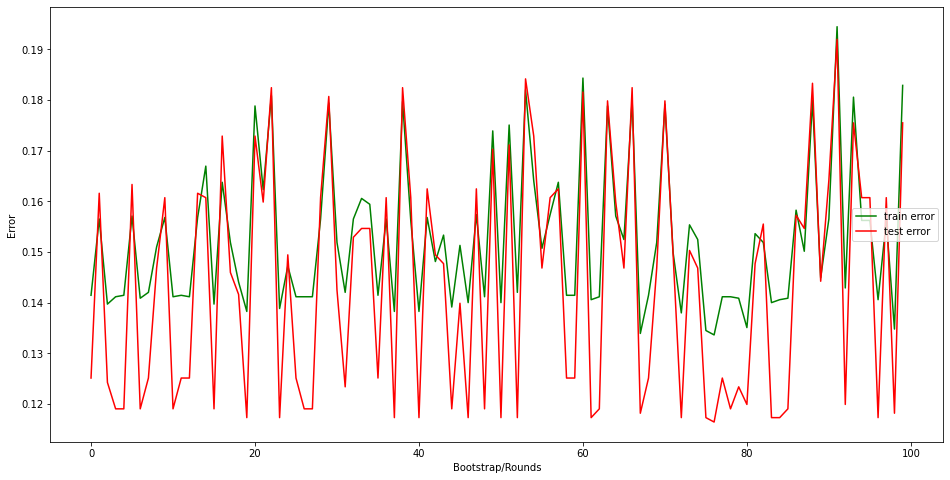

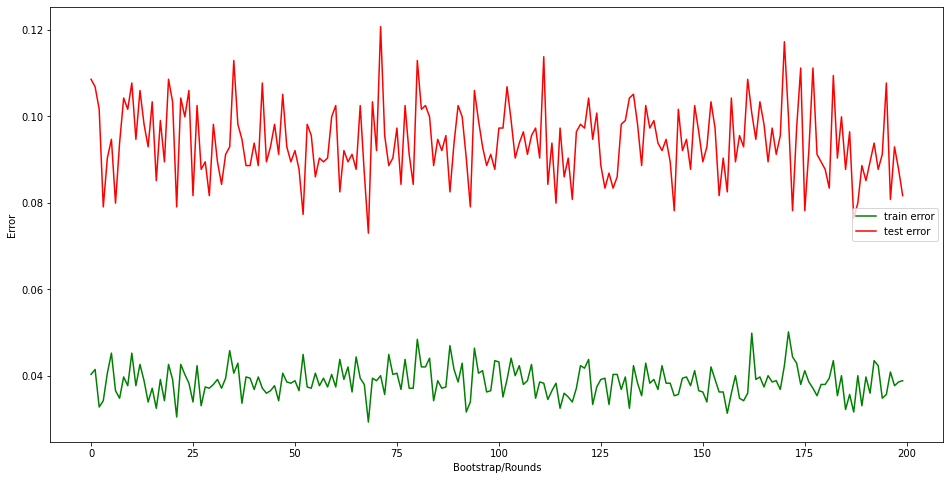

In [35]:
# lets plot the training,testing errors of both models
plot(bag_model,X_train,y_train,X_test,y_test)
plot(bag_model2,X_train,y_train,X_test,y_test)

even though the 1% testing error falls high for second model, it still does a better job in classification. We should be careful in increasing the tree depth as it may lead to overfitting

In [36]:

df = pd.read_fwf('german.data-numeric',header=None)
df[24]=df[24].apply(lambda x:1 if x!=1 else -1)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:24].values, 
                                                    df.iloc[:,24].values, 
                                                    random_state = 123)
# np.unique(y_train)                                                    

In [37]:
# Boosting on German credit data
ada_model = AdaBoost(max_depth =1)
ada_model.fit(X_train,y_train,100)
pred = ada_model.predict(X_test)
acc = accuracy_score(y_test,ada_model.predict(X_test))
print('Accuracy - {0:.2f}% with 100 rounds'.format(acc*100))

Accuracy - 77.20% with 100 rounds


In [38]:
# lets perform adaboost with deeper trees
ada_model2 = AdaBoost(max_depth = 4)
ada_model2.fit(X_train,y_train,100)
pred = ada_model2.predict(X_test)
acc = accuracy_score(y_test,ada_model2.predict(X_test))
print('Accuracy - {0:.2f}% with 100 rounds'.format(acc*100))

Accuracy - 77.20% with 100 rounds


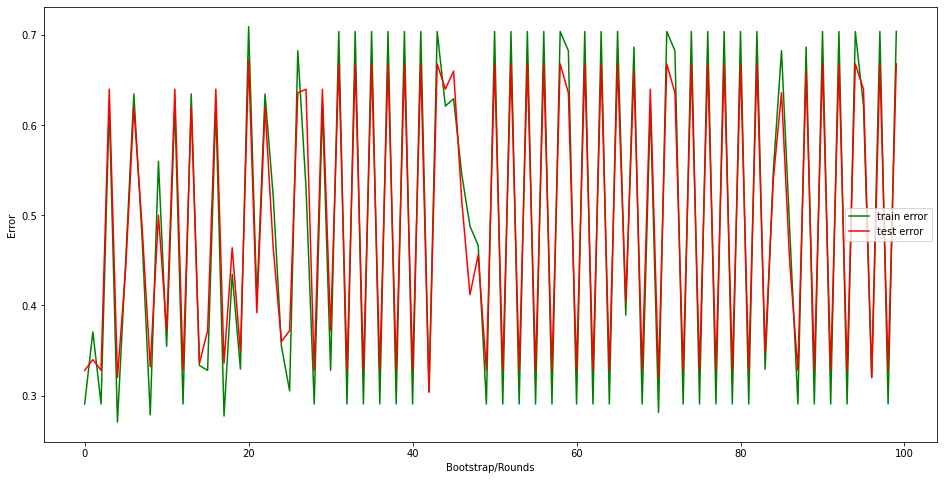

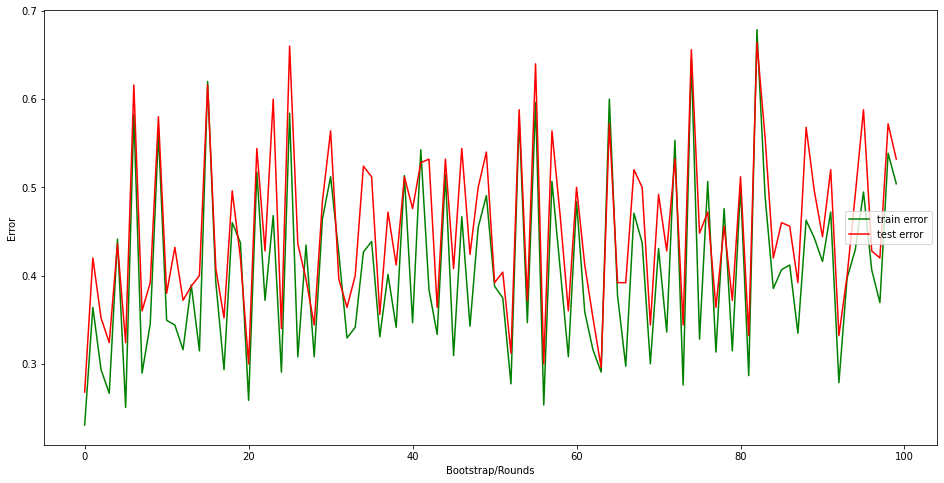

In [39]:
# from the above runs we can observe that the performance gain is minimal compared compared to the computational cost comes with deeper trees,
# this could be due to the fact that our model migth be overfitting
plot(ada_model,X_train,y_train,X_test,y_test)
plot(ada_model2,X_train,y_train,X_test,y_test)

In [40]:
# Bagging 
# setting our weak classifiers as tree stumps
bag_model = Bagging(max_depth=2,seed=456)
bag_model.fit(X_train,y_train,100)
y_pred = bag_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))


Accuracy - 67.20% for stumps with 100 rounds


In [41]:
bag_model2 = Bagging(max_depth=50,seed=123)
bag_model2.fit(X_train,y_train,200)
y_pred = bag_model2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 200 rounds'.format(acc*100))

Accuracy - 74.40% for stumps with 200 rounds


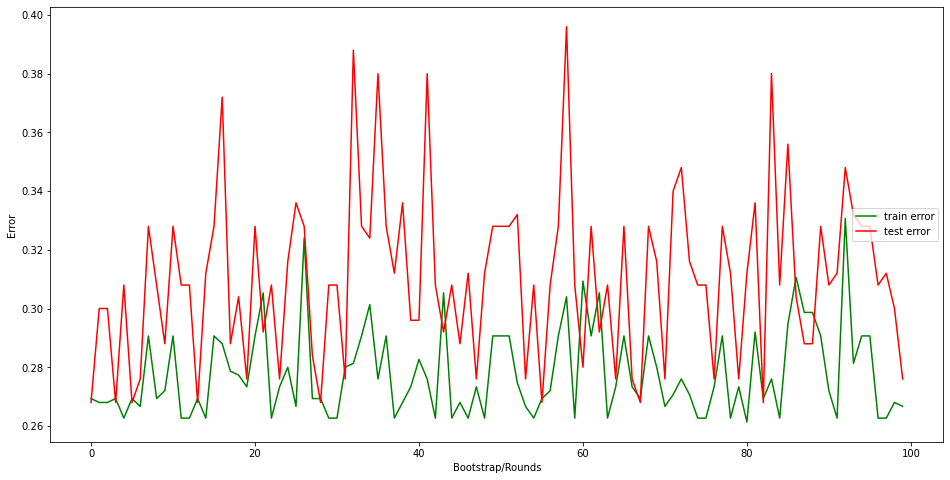

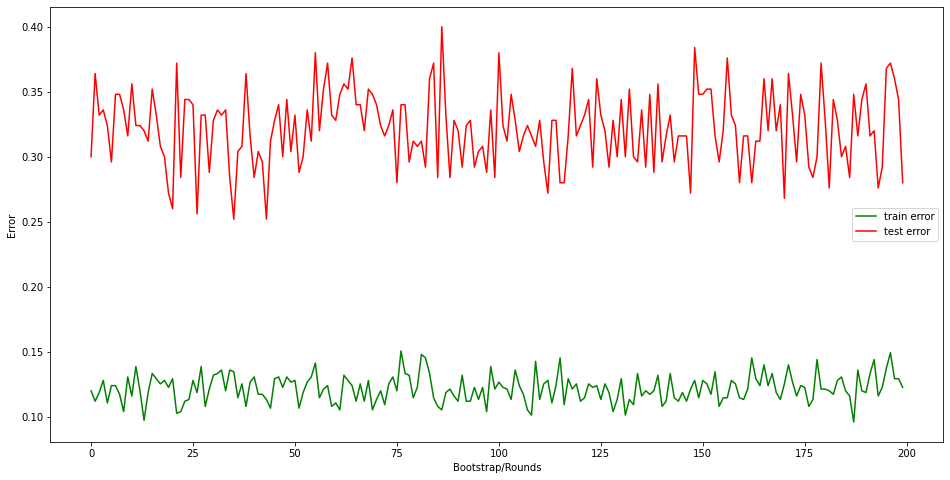

In [42]:
# lets plot the training,testing errors of both models
plot(bag_model,X_train,y_train,X_test,y_test)
plot(bag_model2,X_train,y_train,X_test,y_test)

In bagging for german credit dataset, we can observe that for stump trees both our train, test error are nearly identical but for deeper trees there is a huge difference between test train errors this could be due to our model started to overfit, lets try bagging with little less depth

Accuracy - 74.40% for stumps with 100 rounds


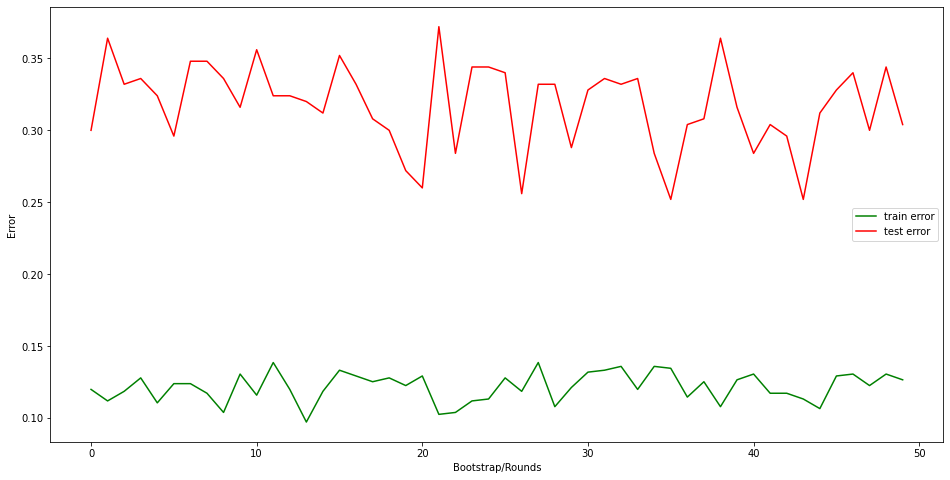

In [43]:
bag_model3 = Bagging(max_depth=50,seed=123)
bag_model3.fit(X_train,y_train,50)
y_pred = bag_model3.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy - {0:.2f}% for stumps with 100 rounds'.format(acc*100))
plot(bag_model3,X_train,y_train,X_test,y_test)

we can notice that our testing errors are not as huge as before with 100 bootstrap and 50 tree depth

<h4>References</h4>
<ol>
<li><div>Datsets used</div>
    <ul>
        <li>Spam base-https://archive.ics.uci.edu/ml/datasets/spambase</li>
        <li>German Credit-https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)</li>
        <li>Letter recognition-https://archive.ics.uci.edu/ml/datasets/letter+recognition</li>
    </ul>
</li>
<li>https://www.section.io/engineering-education/implementing-bagging-algorithms-in-python/</li>
<li>https://dafriedman97.github.io/mlbook/content/c6/s2/bagging.html</li>
<li>https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50</li>
</ol>